In [1]:
import sys, os
sys.path.append(os.path.join(os.getcwd(), ".."))

from system.bio_model.cognitive_map import LifelongCognitiveMap
import system.plotting.plotResults as plot

pybullet build time: Apr 30 2024 14:40:07


DEBUG=False


### Displaying different maps

In [2]:
def draw_map(file, env_model):
    print(file)
    cognitive_map = LifelongCognitiveMap(reachability_estimator=None, load_data_from=file, debug=False)
    plot.plotTrajectoryInEnvironment(env_model=env_model, cognitive_map=cognitive_map, trajectory=False)

pybullet build time: Apr 30 2024 14:40:07


cognitive_map_partial_2.gpickle


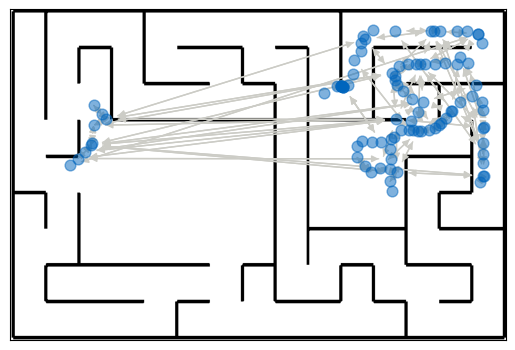

handcrafted.gpickle


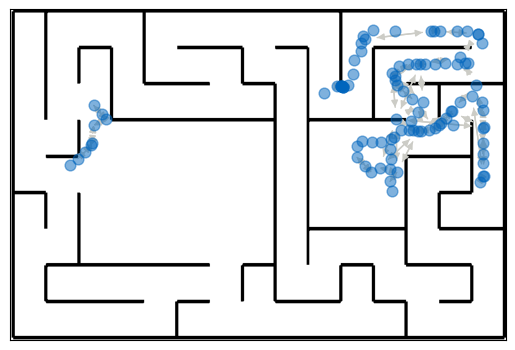

after_lifelong_learning.gpickle


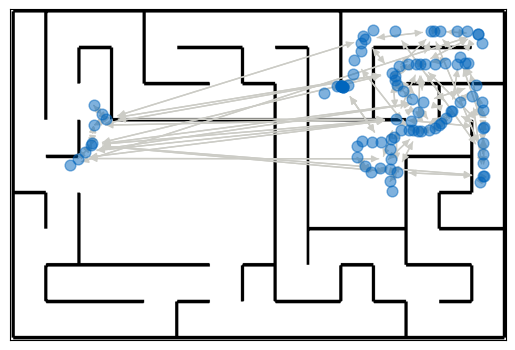

cognitive_map_full.gpickle


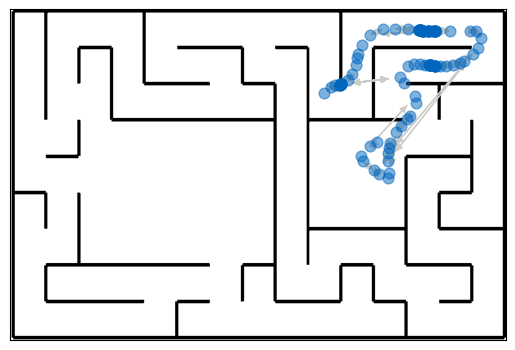

after_exploration.gpickle


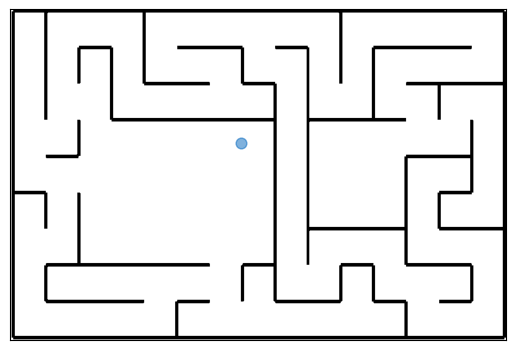

cognitive_map_partial.gpickle


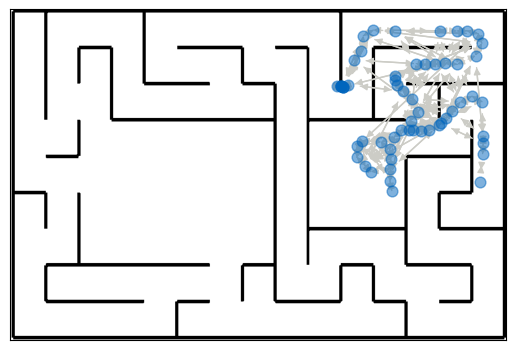

linear_sunburst.after_exploration.gpickle


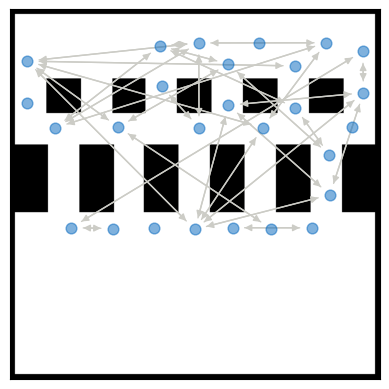

cognitive_map_partial_3.gpickle


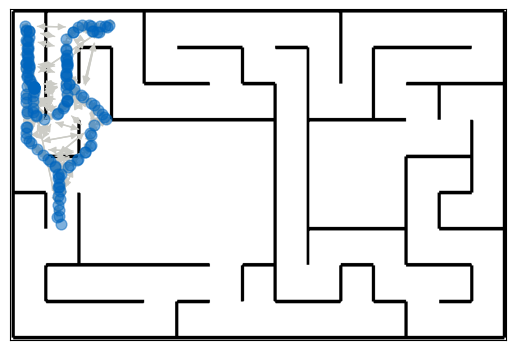

In [3]:
for filename in os.listdir("../system/bio_model/data/cognitive_map"):
    match filename.split("."):
        case (env_model, _type, "gpickle"):
            draw_map(filename, env_model)
        case (type, "gpickle"):
            draw_map(filename, "Savinov_val3")

### Computing grid cell drift

Decoding goal vector to place Cell 0 out of 27
Set new target state
{0: {'reward': 1.0056486080908433, 'idx_place_cell': None, 'distance': 0.05, 'step': 1}, 1: {'reward': 1.0057664669700082, 'idx_place_cell': None, 'distance': -0.25, 'step': 5}}
Decoding goal vector to place Cell 1 out of 27
Set new target state
{0: {'reward': 0.9936955919123536, 'idx_place_cell': None, 'distance': -1.1, 'step': 22}, 1: {'reward': 0.9928664742456785, 'idx_place_cell': None, 'distance': 0.1, 'step': 2}}
Decoding goal vector to place Cell 2 out of 27
Set new target state
{0: {'reward': 0.9914099490951164, 'idx_place_cell': None, 'distance': -2.2, 'step': 44}, 1: {'reward': 1.000105415333783, 'idx_place_cell': None, 'distance': 0.1, 'step': 2}}
Decoding goal vector to place Cell 3 out of 27
Set new target state
{0: {'reward': 1.008417016610341, 'idx_place_cell': None, 'distance': -3.3000000000000003, 'step': 66}, 1: {'reward': 1.0113099474580365, 'idx_place_cell': None, 'distance': 0.1, 'step': 2}}
Decodi

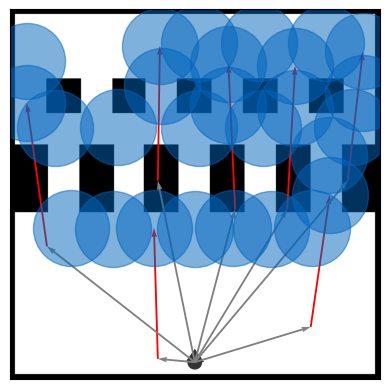

In [3]:
from system.controller.simulation.pybullet_environment import PybulletEnvironment
from system.controller.local_controller.local_navigation import setup_gc_network

map_file = 'linear_sunburst.after_exploration.gpickle'
cognitive_map = LifelongCognitiveMap(reachability_estimator=None, load_data_from=map_file)
with PybulletEnvironment(env_model="linear_sunburst") as env:
    gc_network = setup_gc_network(env.dt)
    cognitive_map.test_place_cell_network(env, gc_network)

# Merging maps

In [2]:
map_files = "cognitive_map_partial", "cognitive_map_partial_3"
map_files = [ file + ".gpickle" for file in map_files ]
maps = [ LifelongCognitiveMap(reachability_estimator=None, load_data_from=map_file, debug=False) for map_file in map_files ]

In [3]:
for i, map in enumerate(maps):
    print("Edge for map", i)
    edge = next(iter(map.node_network.edges))
    print(map.node_network.edges[edge])

Edge for map 0
{'weight': 0.0574221613648944, 'connectivity_probability': 0.95, 'mu': 0.05960367940133437, 'sigma': 0.005669467095138408}
Edge for map 1
{'weight': 0.1723835877321686, 'connectivity_probability': 0.9377825618945104, 'mu': 0.16670678766968194, 'sigma': 0.008660254037844387, 'length': 107}


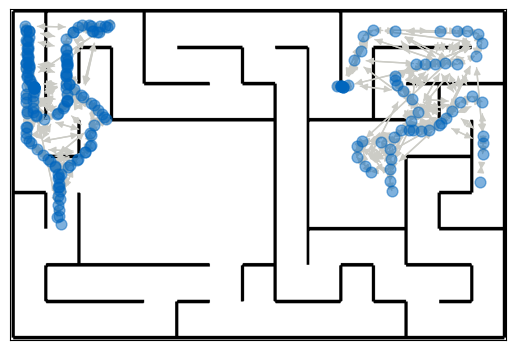

In [10]:
import networkx
new_map = LifelongCognitiveMap(reachability_estimator=None, debug=False)
new_graph = new_map.node_network
for map in maps:
    for node in map.node_network:
        new_graph.add_node(node, pos=node.pos)
    new_graph.add_edges_from(((*edge_start_and_end, edge) for (edge_start_and_end, edge) in map.node_network.edges.items()))
plot.plotTrajectoryInEnvironment(env_model="Savinov_val3", cognitive_map=new_map, trajectory=False)

In [12]:
new_map.save("disjoint.gpickle")